# Image Enhancement

Author Noshaba Nasir


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

In [2]:
# read image
#folder= "C:\\Users\\Admin\\Pictures\\Camera Roll\\"
#file= "C:\\Users\\Admin\\Pictures\\Camera Roll\\WIN_20211109_13_11_28_Pro.jpg"
folder=""
file= "cameraman.png"
img = cv2.imread(folder+file, 0)  # read image in grey scale

In [3]:
# shape
m,n = img.shape
print(m,n)

256 256


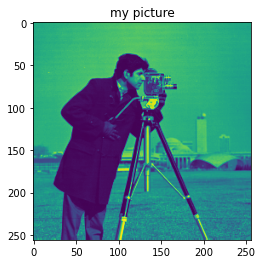

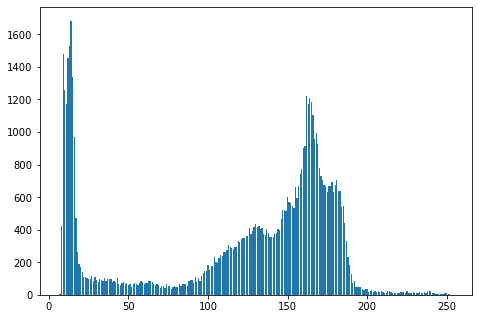

In [4]:
# util functions to plot image, save image and create its histogram
def plotimage(img):
    plt.imshow(img)
    plt.title('my picture')
    plt.show()
plotimage(img)

def saveimage(file, img):
    cv2.imwrite(file, img)
#saveimage(folder+"\\bw.jpg", img)

# histrogram stretch
def create_histogram(img, title=""):
    (unique,counts)=np.unique(img, return_counts=True)
    #frequencies = numpy.asarray((unique, counts)).T
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(unique,counts)
    ax.set_title(title)
    plt.show()

create_histogram(img)

# Linear and Piece wise linear mapping

In [5]:
# creating equations
def slopeintercept(t):
    slope= (t[3]-t[2])/(t[1]-t[0])
    intercept= t[3]-(slope*t[1])
    return slope, intercept

# specify mapping regions
# each tuple in point array is for two extreme points on the linear equation.
# for example to mape 0 - 35  to 0 - 150, tuple in points will be 0,35,0,150
points=[(0,35,0,150),(35,80,100,150), (80,200,100,255),(200,255,240,255)]
# eq array will contain slope and intercept of each linear piece
eq= [slopeintercept(i) for i in points]
#print(eq)



In [6]:
def piecewise_mapping(z):    
    for i in range(len(points)):
        if z>=points[i][0] and z<points[i][1]:
            return z*eq[i][0]+eq[i][1]
    return z

vec_piecewise_mapping = np.vectorize(piecewise_mapping)
#just for testing
#mymatrix = np.matrix('27 28 30 ; 74 75 76; 245 200 255')
#result = vec_piecewise_mapping(mymatrix)
#print(result)

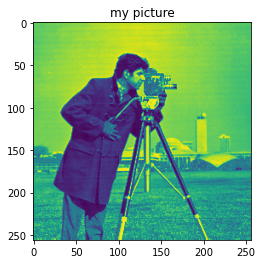

In [7]:
mapped_image= vec_piecewise_mapping(img)
saveimage(folder+"mappedimg.png", mapped_image)
plotimage(mapped_image)

# Histogram stretch 


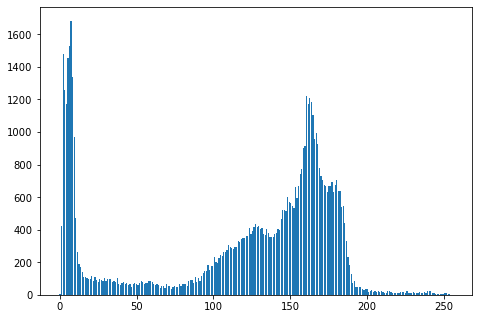

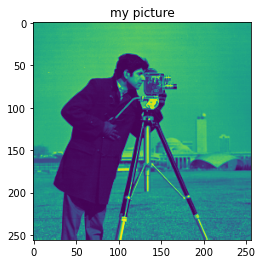

In [8]:
stretchedimg= img.copy()

# max min in image
_max= img.max()
_min=img.min()

# max min after mapping
MAX=255
MIN=0

stretchedimg= stretchedimg-_min
stretchedimg = stretchedimg/(_max-_min)
stretchedimg= stretchedimg*(MAX+MIN)+MIN


create_histogram(stretchedimg)
saveimage(folder+"stretched.png",stretchedimg)
plotimage(stretchedimg)

# Histogram Equalization

In [9]:
# histogram equalization
# Frequencies of grey levels
(unique,counts)=np.unique(img, return_counts=True)
# max value after mapping
MAX=255 #unique.max()

#rolling sum of counts
rolling_sum=np.cumsum(counts)
#normalize

rollingsum_max= rolling_sum.max()
rolling_sum= rolling_sum*MAX/rollingsum_max
#round to nearest integer
rolling_sum= np.rint(rolling_sum)

# can create a hashmap to spead up
map_old_new= {}
for i in range(len(unique)):
    #print(OLD[i],NEW[i] )
    map_old_new[unique[i]]=rolling_sum[i] 
    
#print(unique,rolling_sum,map_old_new )

In [10]:
def hist_equalization_map(z):   
    return int(map_old_new.get(z,z))
vec_hist_equalization_map = np.vectorize(hist_equalization_map)
#just for testing
#hist_equalization_map(24, )
#a=np.array([7,8,10])
#vec_hist_equalization_map(a)


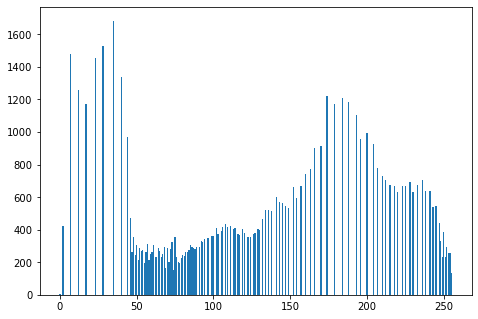

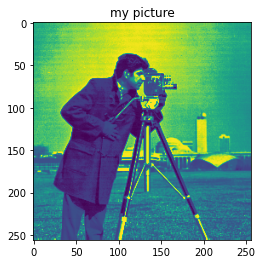

In [11]:
hist_equalized_img=vec_hist_equalization_map(img)
create_histogram(hist_equalized_img)
saveimage(folder+"hist_equalized_img.png",hist_equalized_img)
plotimage(hist_equalized_img)